# Hotel Bookings Cancellation Prediction

- Predicting Hotel Booking Cancellation in Portugal is a machine learning classification project that will try to predict whether a booking will be cancelled or not using machine learning models based on historical data.
- The data for this project is from Hotel Booking Demand Dataset Sciencedirect. This data was acquired by extraction from hotel’s Property management system from 2015 to 2017 from hotel in Region Algarve and Lisbon.


### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
df=pd.read_csv('hotel_bookings (1).csv')
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Removing duplicates

In [4]:
df=df.drop_duplicates()
df.reset_index(drop=True,inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,87396,87396,87396,86944,87396,87396,87396,87396,87396,87396,87396,87396
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-02-14
freq,53428,11257,67978,27453,51618,69141,56552,46313,86251,71986,63371,211


##  Identifying the Target Variable

'is_canceled' is the target column in the dataset and it has no missing values. It takes two values 1 for cancelled status and 0 for not cancelled.

In [8]:
df["is_canceled"].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

# EDA
## Find Missing Values

In [9]:
nulls=pd.DataFrame({"col_name":df.columns,"null_count":df.isnull().sum()})
nulls["nulls_percentage"]=round(nulls["null_count"]*100/df.shape[0],2)
nulls

,col_name,null_count,nulls_percentage
hotel,hotel,0,0.00
is_canceled,is_canceled,0,0.00
lead_time,lead_time,0,0.00
arrival_date_year,arrival_date_year,0,0.00
arrival_date_month,arrival_date_month,0,0.00
arrival_date_week_number,arrival_date_week_number,0,0.00
arrival_date_day_of_month,arrival_date_day_of_month,0,0.00
stays_in_weekend_nights,stays_in_weekend_nights,0,0.00
stays_in_week_nights,stays_in_week_nights,0,0.00
adults,adults,0,0.00


In [10]:
df['company'].value_counts()

40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ... 
10.0       1
419.0      1
415.0      1
425.0      1
534.0      1
Name: company, Length: 352, dtype: int64

The column 'Company' is having 93.98% missing values.Hence the same can be removed from dataset.

In [11]:
df.drop('company',axis=1,inplace=True)

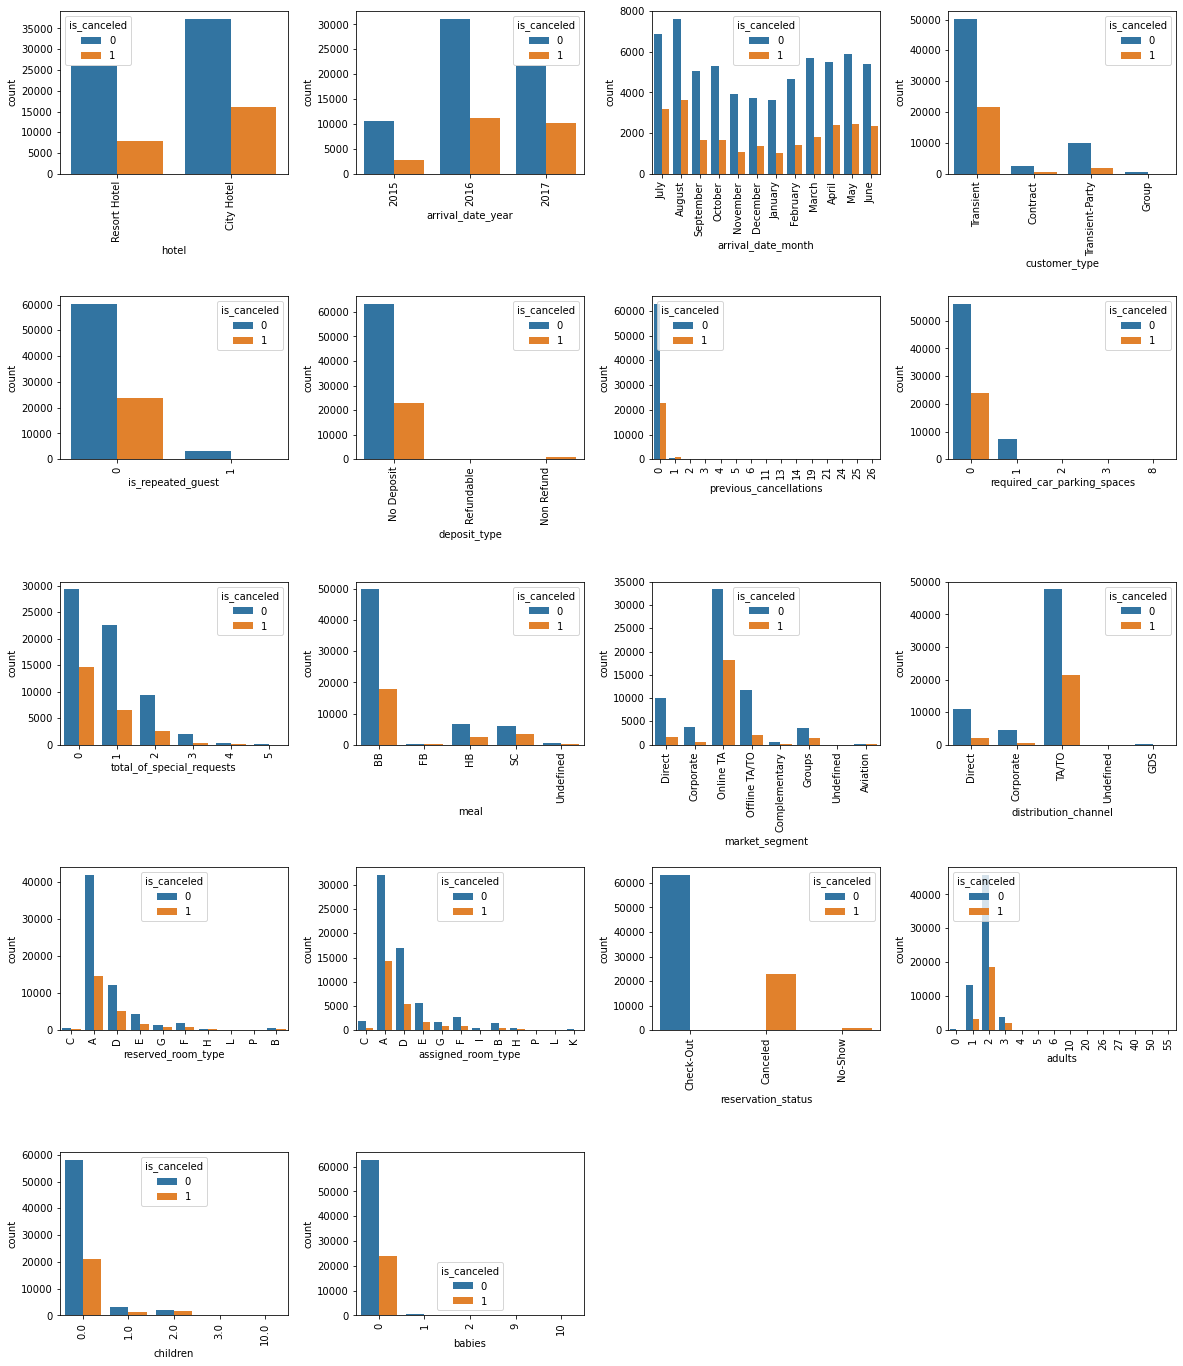

In [12]:
cols=['hotel','arrival_date_year','arrival_date_month','customer_type','is_repeated_guest','deposit_type','previous_cancellations',
      'required_car_parking_spaces','total_of_special_requests','meal','market_segment','distribution_channel',
      'reserved_room_type','assigned_room_type','reservation_status','adults','children','babies']
plt.figure(figsize=(20,24))
plt.subplots_adjust(wspace=0.30,hspace=0.75)
for i in range(len(cols)):
    plt.subplot(5,4,i+1)
    plt.xticks(rotation=90)
    sns.countplot(df[cols[i]],hue=df["is_canceled"])
      


From the dataset it can be observed that the reservation status and reservation status dates are updated on/after the day of arrival.Since the intention is to predict whether a booking will get cancelled these columns are irrelevant.

In [13]:
Cancellation_rate=df.loc[df['is_canceled']==1,'hotel'].value_counts()/df['hotel'].value_counts()*100
print("Hotel wise cancellation rate is :\n",round(Cancellation_rate,2))

Hotel wise cancellation rate is :
 City Hotel      30.04
Resort Hotel    23.48
Name: hotel, dtype: float64


In [14]:
df['lead_time'].value_counts()

0      5978
1      3216
2      1927
3      1704
4      1570
       ... 
410       1
411       1
371       1
532       1
463       1
Name: lead_time, Length: 479, dtype: int64

<AxesSubplot:xlabel='is_canceled', ylabel='lead_time'>

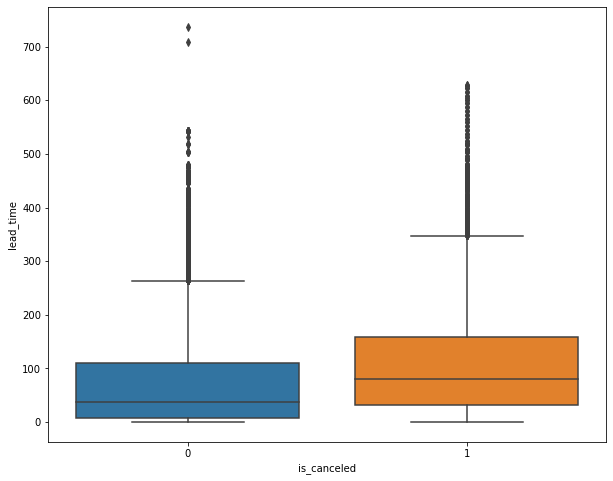

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='is_canceled',y='lead_time')

There are some outliers in the column 'lead_time' which need to me removed.

In [16]:
df['arrival_date_week_number'].value_counts()

33    2793
34    2491
32    2449
28    2344
30    2335
31    2287
29    2197
27    2166
35    2105
18    2089
21    2044
15    1989
17    1878
23    1872
20    1843
13    1818
19    1813
25    1786
22    1753
24    1746
26    1739
16    1737
14    1693
41    1663
11    1658
38    1635
7     1630
10    1630
36    1626
43    1605
39    1590
9     1579
12    1573
44    1550
8     1525
37    1474
42    1445
40    1427
53    1423
45    1315
6     1299
47    1289
48    1199
49    1170
46    1141
4     1125
5     1101
52    1061
50    1053
3     1050
2      945
1      862
51     786
Name: arrival_date_week_number, dtype: int64

<AxesSubplot:xlabel='is_canceled', ylabel='arrival_date_week_number'>

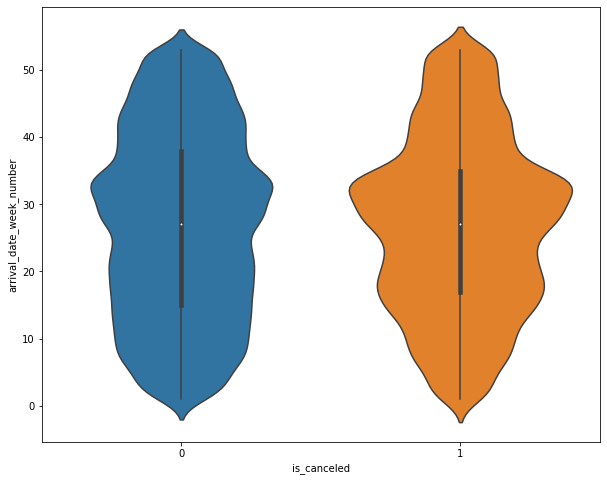

In [17]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df,x='is_canceled',y='arrival_date_week_number')

<AxesSubplot:xlabel='arrival_date_month', ylabel='arrival_date_week_number'>

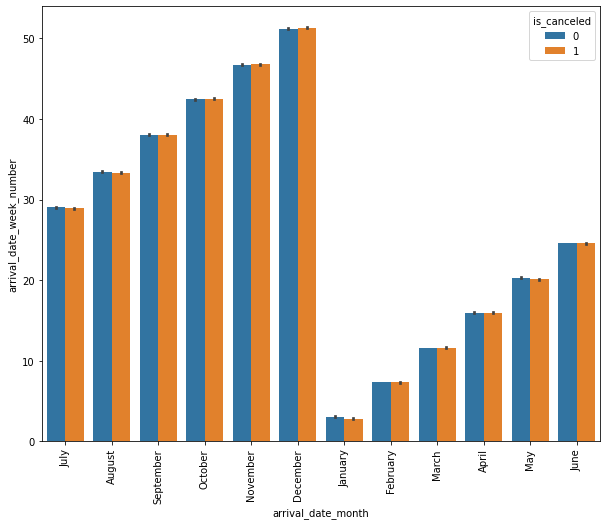

In [18]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.barplot(data=df,x='arrival_date_month',y='arrival_date_week_number',hue='is_canceled')

So the column 'arrival_date_week_number' is another representation of the month and there doesn't seem to have any effect on the prediction.Hence it can be ignored.

<Figure size 720x576 with 0 Axes>

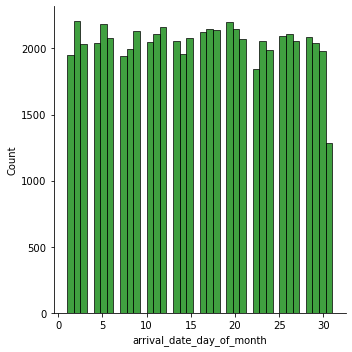

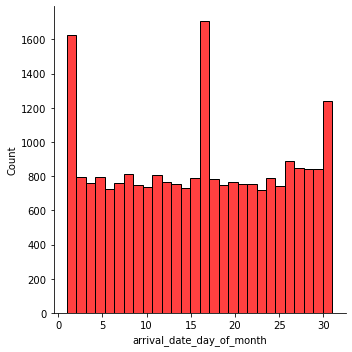

In [19]:
plt.figure(figsize=(10,8))
sns.displot(df[df['is_canceled']==0]['arrival_date_day_of_month'],color='g')
sns.displot(df[df['is_canceled']==1]['arrival_date_day_of_month'],color='r')

In [20]:
df['stays_in_week_nights'].value_counts()

1     22191
2     20744
3     16259
5      9663
4      7874
0      6175
6      1379
10      972
7       967
8       613
9       219
15       68
11       50
20       41
12       40
13       27
14       25
19       21
21       15
16       13
22        7
25        6
18        6
30        5
17        4
24        2
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64

In [21]:
df['stays_in_weekend_nights'].value_counts()

0     35151
2     26414
1     22657
4      1734
3      1150
6       113
5        70
8        60
7        15
9        10
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

<AxesSubplot:xlabel='is_canceled', ylabel='stays_in_week_nights'>

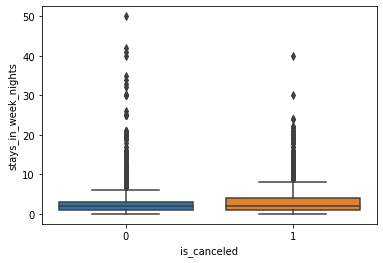

In [22]:
sns.boxplot(data=df,x='is_canceled',y='stays_in_week_nights')

<AxesSubplot:xlabel='is_canceled', ylabel='stays_in_weekend_nights'>

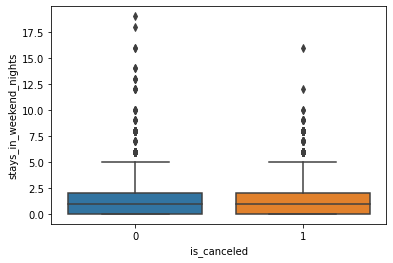

In [23]:
sns.boxplot(data=df,x='is_canceled',y='stays_in_weekend_nights')

There are some outliers in "stays_in_weekend_nights" and "stays_in_week_nights" which need to be replaced with values close to the 100th percentile as they might be representing the actual no of days of stay.

In [24]:
df['adults'].value_counts()

2     64497
1     16503
3      5935
0       385
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

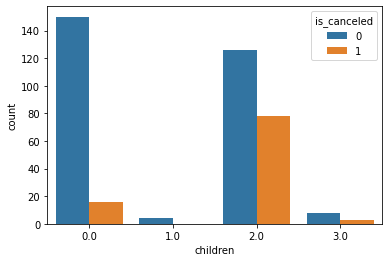

In [25]:
sns.countplot(df[df['adults']==0]['children'],hue=df['is_canceled'])

In [26]:
df['children'].value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [27]:
df['babies'].value_counts()

0     86482
1       897
2        15
10        1
9         1
Name: babies, dtype: int64

* The categories 4 and above in "adult" column can be combined to a single category.
* Categories 2 and above can be combined in 'children' column.
* Categories 1 and above can be combined in 'babies' column.

In [28]:
df['previous_cancellations'].value_counts()

0     85711
1      1407
2       112
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
14        1
19        1
21        1
Name: previous_cancellations, dtype: int64

Text(0.5, 1.0, 'prev cancellation>2')

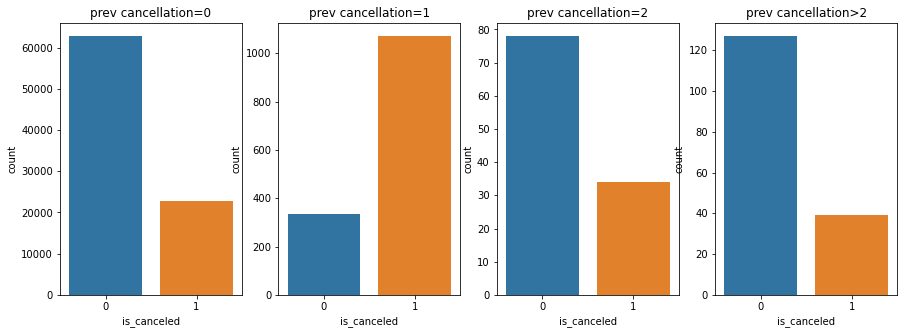

In [29]:
fig,axes=plt.subplots(1,4,figsize=(15,5))
sns.countplot(df[df['previous_cancellations']==0]['is_canceled'],ax=axes[0])
axes[0].set_title('prev cancellation=0')
sns.countplot(df[df['previous_cancellations']==1]['is_canceled'],ax=axes[1])
axes[1].set_title('prev cancellation=1')
sns.countplot(df[df['previous_cancellations']==2]['is_canceled'],ax=axes[2])
axes[2].set_title('prev cancellation=2')
sns.countplot(df[df['previous_cancellations']>2]['is_canceled'],ax=axes[3])
axes[3].set_title('prev cancellation>2')

Previous_cancellations above 1 can be combined to a single category

In [30]:
df['previous_bookings_not_canceled'].value_counts()

0     83851
1      1482
2       580
3       331
4       228
      ...  
47        1
49        1
50        1
51        1
72        1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

Text(0.5, 1.0, 'previous_bookings_not_canceled>2')

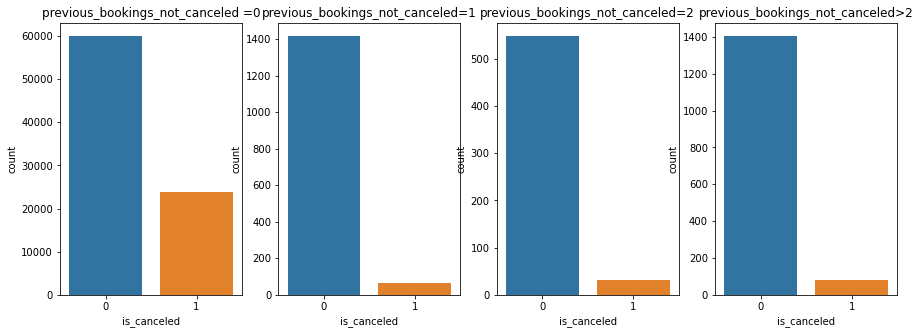

In [31]:
fig,axes=plt.subplots(1,4,figsize=(15,5))
sns.countplot(df[df['previous_bookings_not_canceled']==0]['is_canceled'],ax=axes[0])
axes[0].set_title('previous_bookings_not_canceled =0')
sns.countplot(df[df['previous_bookings_not_canceled']==1]['is_canceled'],ax=axes[1])
axes[1].set_title('previous_bookings_not_canceled=1')
sns.countplot(df[df['previous_bookings_not_canceled']==2]['is_canceled'],ax=axes[2])
axes[2].set_title('previous_bookings_not_canceled=2')
sns.countplot(df[df['previous_bookings_not_canceled']>2]['is_canceled'],ax=axes[3])
axes[3].set_title('previous_bookings_not_canceled>2')

previous_bookings_not_canceled equal to and above 1 can be combined to a single category

In [32]:
df['booking_changes'].value_counts()

0     71494
1     10902
2      3508
3       875
4       356
5       116
6        59
7        31
8        17
9         8
10        6
13        5
14        5
15        3
16        2
17        2
12        2
11        2
20        1
21        1
18        1
Name: booking_changes, dtype: int64

Text(0.5, 1.0, 'booking change>2')

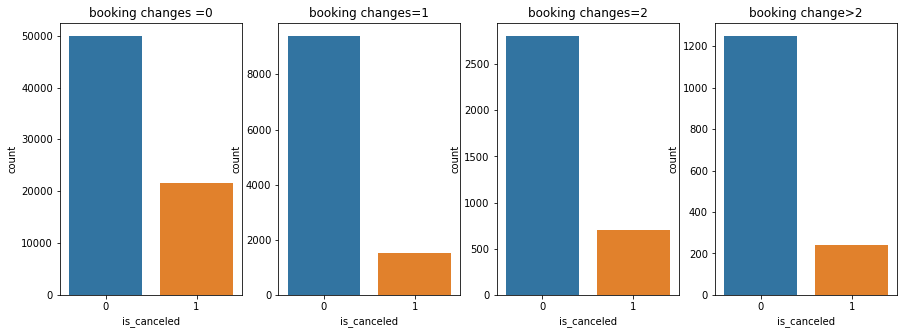

In [33]:
fig,axes=plt.subplots(1,4,figsize=(15,5))
sns.countplot(df[df['booking_changes']==0]['is_canceled'],ax=axes[0])
axes[0].set_title('booking changes =0')
sns.countplot(df[df['booking_changes']==1]['is_canceled'],ax=axes[1])
axes[1].set_title('booking changes=1')
sns.countplot(df[df['booking_changes']==2]['is_canceled'],ax=axes[2])
axes[2].set_title('booking changes=2')
sns.countplot(df[df['booking_changes']>2]['is_canceled'],ax=axes[3])
axes[3].set_title('booking change>2')

Booking_changes above 2 can be combined to a single category.

In [34]:
df['agent'].value_counts().head(20)

9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
241.0     1644
28.0      1502
8.0       1383
1.0       1232
6.0       1117
40.0       986
314.0      844
242.0      722
83.0       614
85.0       524
243.0      477
171.0      402
27.0       395
3.0        363
22.0       345
Name: agent, dtype: int64

<AxesSubplot:xlabel='is_canceled', ylabel='agent'>

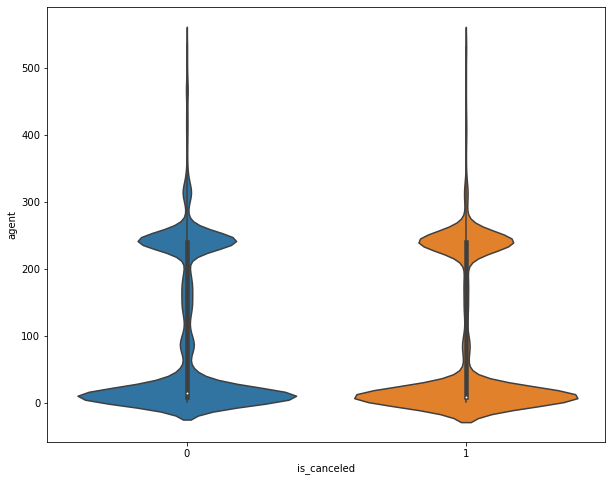

In [35]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df,x='is_canceled',y='agent')

<AxesSubplot:xlabel='agent', ylabel='Count'>

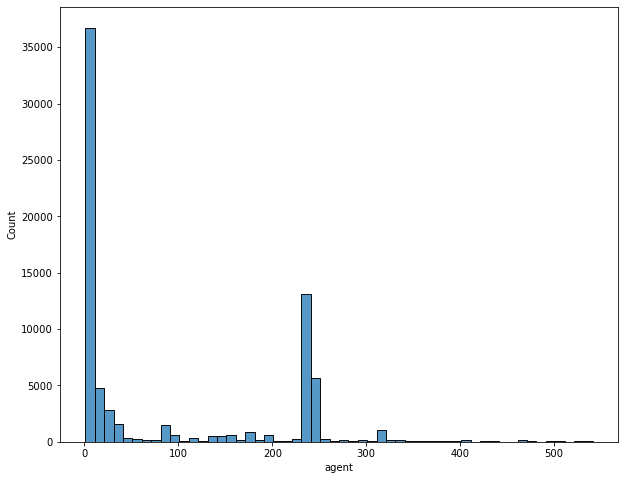

In [36]:
plt.figure(figsize=(10,8))
sns.histplot(df['agent'],binwidth=10)

The 'agent' column follows a patter in its distribution.It has high density in 0-30 range approx and 230-250 approx.There are also missing values in the column which need to be filled.

In [37]:
df['days_in_waiting_list'].value_counts()

0      86536
63        53
87        25
44        23
15        22
       ...  
79         1
120        1
160        1
85         1
36         1
Name: days_in_waiting_list, Length: 128, dtype: int64

Text(0.5, 1.0, 'days in waiting list>0')

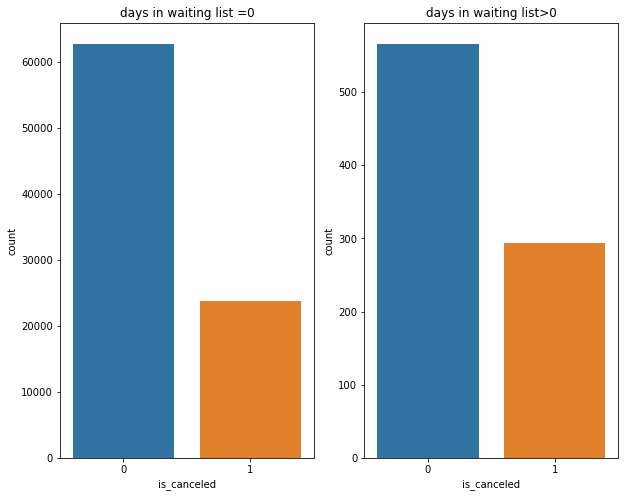

In [38]:
fig,axes=plt.subplots(1,2,figsize=(10,8))
sns.countplot(df[df['days_in_waiting_list']==0]['is_canceled'],ax=axes[0])
axes[0].set_title('days in waiting list =0')
sns.countplot(df[df['days_in_waiting_list']>0]['is_canceled'],ax=axes[1])
axes[1].set_title('days in waiting list>0')

Days in waiting list above 0 can be combined to a single category.

In [39]:
df['adr'].value_counts()

0.00      1778
75.00     1320
65.00     1260
48.00      878
85.00      858
          ... 
55.11        1
33.65        1
31.41        1
31.80        1
157.71       1
Name: adr, Length: 8879, dtype: int64

<AxesSubplot:xlabel='is_canceled', ylabel='adr'>

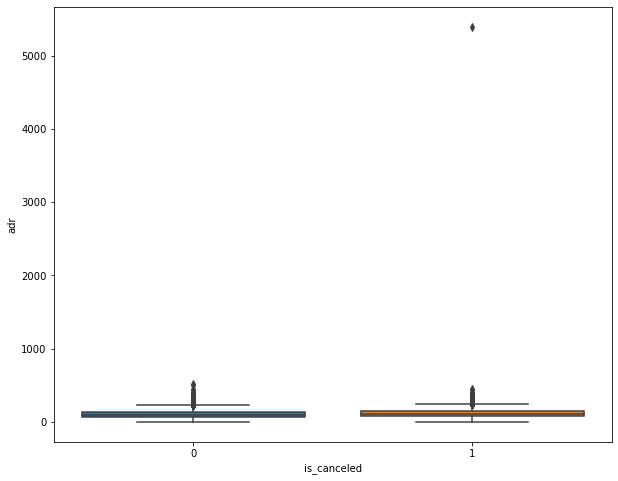

In [40]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='is_canceled',y='adr')

There are outliers in adr column and need to be replaced.

<AxesSubplot:xlabel='is_canceled', ylabel='adr'>

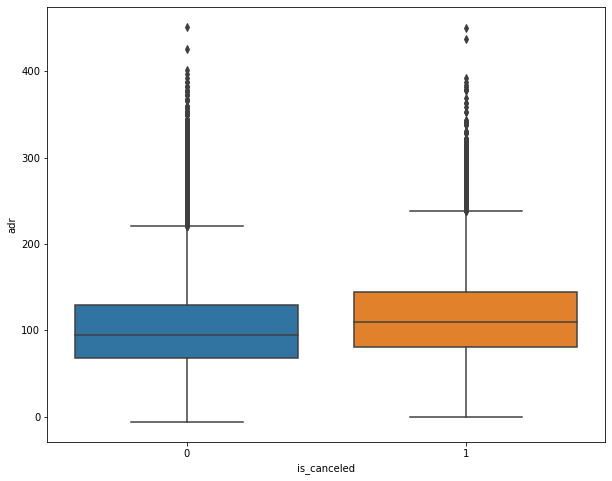

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='is_canceled',y=df[df['adr']<500]['adr'])

In [42]:
df['deposit_type'].value_counts()

No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

Text(0.5, 1.0, 'Refundable')

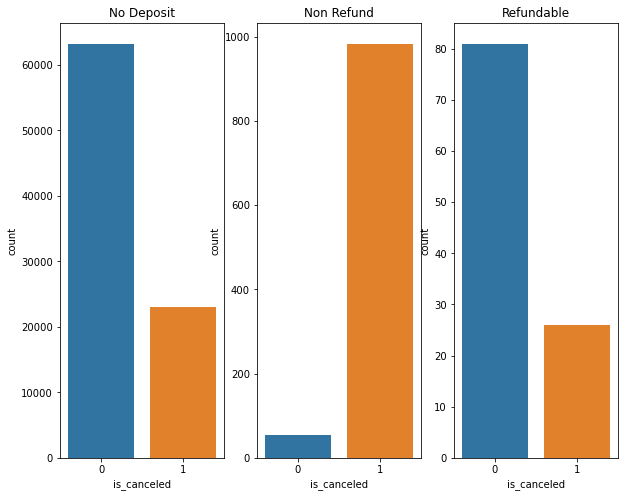

In [43]:
fig,axes=plt.subplots(1,3,figsize=(10,8))
sns.countplot(df[df['deposit_type']=='No Deposit']['is_canceled'],ax=axes[0])
axes[0].set_title('No Deposit')
sns.countplot(df[df['deposit_type']=='Non Refund']['is_canceled'],ax=axes[1])
axes[1].set_title('Non Refund')
sns.countplot(df[df['deposit_type']=='Refundable']['is_canceled'],ax=axes[2])
axes[2].set_title('Refundable')

Text(0.5, 1.0, 'Different room assigned')

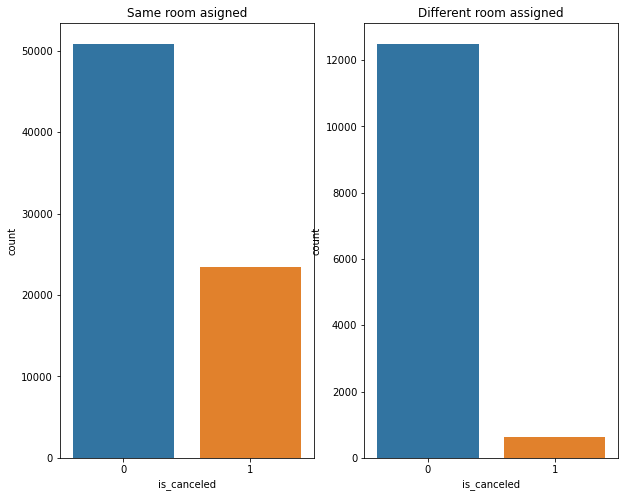

In [44]:
fig,axes=plt.subplots(1,2,figsize=(10,8))
sns.countplot(df[df['reserved_room_type']==df['assigned_room_type']]['is_canceled'],ax=axes[0])
axes[0].set_title('Same room asigned')
sns.countplot(df[df['reserved_room_type']!=df['assigned_room_type']]['is_canceled'],ax=axes[1])
axes[1].set_title('Different room assigned')

In [45]:
df['country'].value_counts().head(50)

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
USA     1875
CHE     1570
CN      1093
AUT      947
SWE      837
CHN      816
POL      765
RUS      561
NOR      515
ROU      458
FIN      422
ISR      403
DNK      384
AUS      378
AGO      342
LUX      262
MAR      232
TUR      213
ARG      203
HUN      202
JPN      183
IND      143
CZE      136
KOR      119
GRC      117
HRV       91
DZA       82
IRN       80
EST       79
ZAF       78
MEX       74
LTU       73
COL       69
BGR       68
CHL       65
NZL       63
UKR       62
MOZ       56
SRB       54
LVA       51
Name: country, dtype: int64

# DATA PREPROCESSING

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            

## Drop the irrelevant columns

In [47]:
df.drop(['arrival_date_week_number','reservation_status_date'],axis=1,inplace=True)

## Fill the missing values

In [48]:
df['agent']=df['agent'].fillna(df['agent'].mean())

In [49]:
df['country']=df['country'].fillna(df['country'].mode()[0])
df['country'].value_counts()

PRT    27905
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

In [50]:
df['children']=df['children'].fillna(0)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_day_of_month       87396 non-null  int64  
 6   stays_in_weekend_nights         87396 non-null  int64  
 7   stays_in_week_nights            87396 non-null  int64  
 8   adults                          87396 non-null  int64  
 9   children                        87396 non-null  float64
 10  babies                          87396 non-null  int64  
 11  meal                            87396 non-null  object 
 12  country                         

## Remove and Replace the Outliers

In [52]:
Q1=np.percentile(df['lead_time'],25)
Q2=np.percentile(df['lead_time'],50)
Q3=np.percentile(df['lead_time'],75)
lead_time_median=df['lead_time'].median()
IQR_leadtime=Q3-Q1
lower_lim=Q1-1.5*IQR_leadtime
upper_lim=Q3+1.5*IQR_leadtime
print(lower_lim,upper_lim)
print("no: of outliers=",len(df[(df['lead_time']<lower_lim)|(df['lead_time']>upper_lim)]))
df['lead_time']=np.where((df["lead_time"]< lower_lim)|(df['lead_time']> upper_lim),lead_time_median,df['lead_time'])

-160.0 296.0
no: of outliers= 2396


<AxesSubplot:xlabel='is_canceled', ylabel='lead_time'>

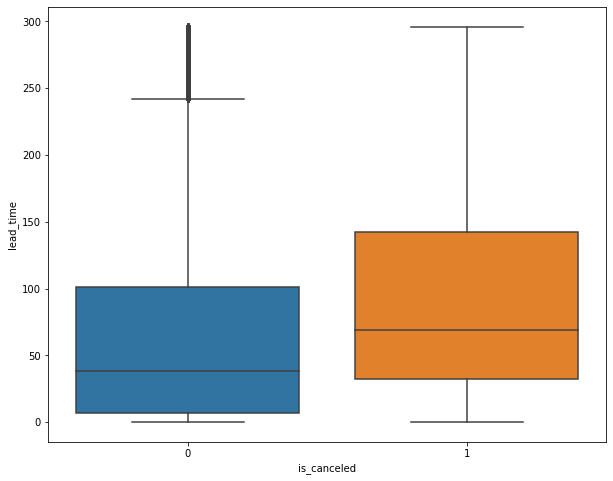

In [53]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='is_canceled',y='lead_time')

In [54]:
Q1=np.percentile(df['stays_in_week_nights'],25)
Q2=np.percentile(df['stays_in_week_nights'],50)
Q3=np.percentile(df['stays_in_week_nights'],75)
threshold=np.percentile(df['stays_in_week_nights'],95)
IQR_weekstay=Q3-Q1
lower_lim=Q1-1.5*IQR_weekstay
upper_lim=Q3+1.5*IQR_weekstay
print(lower_lim,upper_lim)
print("no: of outliers=",len(df[(df['stays_in_week_nights']<lower_lim)|(df['stays_in_week_nights']>upper_lim)]))
df['stays_in_week_nights']=np.where((df["stays_in_week_nights"]< lower_lim)|(df['stays_in_week_nights']> upper_lim),threshold,df['stays_in_week_nights'])

-3.5 8.5
no: of outliers= 1531


<AxesSubplot:xlabel='stays_in_week_nights', ylabel='count'>

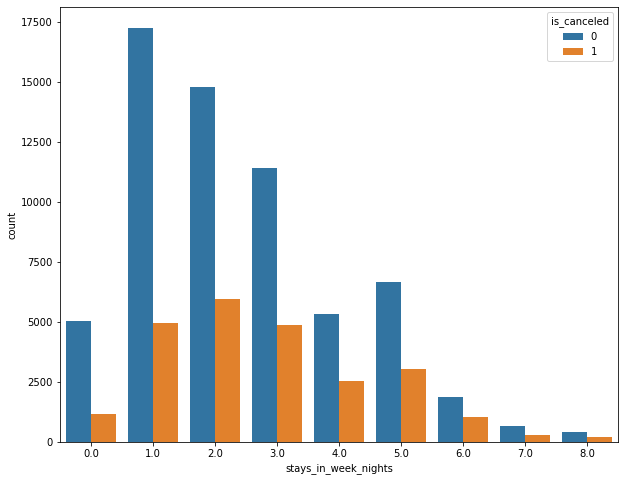

In [55]:
plt.figure(figsize=(10,8))
sns.countplot(df['stays_in_week_nights'],hue=df['is_canceled'])

In [56]:
Q1=np.percentile(df['stays_in_weekend_nights'],25)
Q2=np.percentile(df['stays_in_weekend_nights'],50)
Q3=np.percentile(df['stays_in_weekend_nights'],75)
threshold=np.percentile(df['stays_in_weekend_nights'],95)
IQR_weekendstay=Q3-Q1
lower_lim=Q1-1.5*IQR_weekendstay
upper_lim=Q3+1.5*IQR_weekendstay
print(lower_lim,upper_lim)
print("no: of outliers=",len(df[(df['stays_in_weekend_nights']<lower_lim)|(df['stays_in_weekend_nights']>upper_lim)]))
df['stays_in_weekend_nights']=np.where((df["stays_in_weekend_nights"]< lower_lim)|(df['stays_in_weekend_nights']> upper_lim),threshold,df['stays_in_weekend_nights'])

-3.0 5.0
no: of outliers= 220


<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='count'>

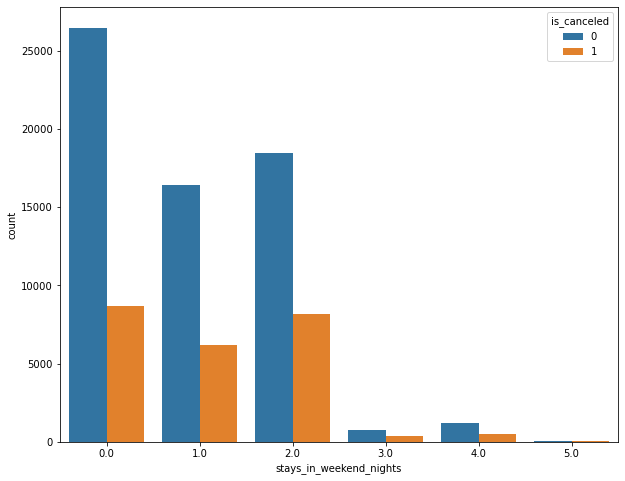

In [57]:
plt.figure(figsize=(10,8))
sns.countplot(df['stays_in_weekend_nights'],hue=df['is_canceled'])

In [58]:
Q1=np.percentile(df['agent'],25)
Q2=np.percentile(df['agent'],50)
Q3=np.percentile(df['agent'],75)
threshold=np.percentile(df['agent'],95)
IQR_agent=Q3-Q1
lower_lim=Q1-1.5*IQR_agent
upper_lim=Q3+1.5*IQR_agent
print(lower_lim,upper_lim)
print("no: of outliers=",len(df[(df['agent']<lower_lim)|(df['agent']>upper_lim)]))
df['agent']=np.where((df["agent"]< lower_lim)|(df['agent']> upper_lim),threshold,df['agent'])

-328.5 571.5
no: of outliers= 0


There are no outliers in agent column

In [59]:
Q1=np.percentile(df['adr'],25)
Q2=np.percentile(df['adr'],50)
Q3=np.percentile(df['adr'],75)
threshold=np.percentile(df['adr'],95)
IQR_adr=Q3-Q1
lower_lim=Q1-1.5*IQR_adr
upper_lim=Q3+1.5*IQR_adr
print(lower_lim,upper_lim)
print("no: of outliers=",len(df[(df['adr']<lower_lim)|(df['adr']>upper_lim)]))
df['adr']=np.where((df["adr"]< lower_lim)|(df['adr']> upper_lim),threshold,df['adr'])

-21.0 227.0
no: of outliers= 2490


<AxesSubplot:xlabel='is_canceled', ylabel='adr'>

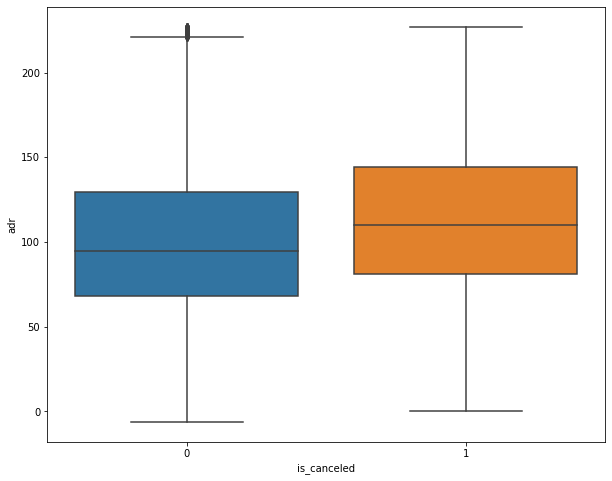

In [60]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='is_canceled',y='adr')

## Merging Categories

As per our EDA,the following conclusions were arrived.
* The values 4 and above in "adult" column can be combined to a single category.
* Values 2 and above can be combined in 'children' column.
* Values 2 and above can be combined in 'babies' column.
* Previous_cancellations above 1 can be combined to a single category
* previous_bookings_not_canceled equal to and above 1 can be combined to a single category
* Booking_changes above 2 can be combined to a single category.
* Days in waiting list above 0 can be combined to a single category.

In [61]:
df['adults']=df['adults'].apply(lambda x:4 if x >= 4 else x)
df['adults'].value_counts()

2    64497
1    16503
3     5935
0      385
4       76
Name: adults, dtype: int64

In [62]:
df['children']=df['children'].apply(lambda x:2 if x >= 2 else x)
df['children'].value_counts()

0.0    79032
1.0     4695
2.0     3669
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

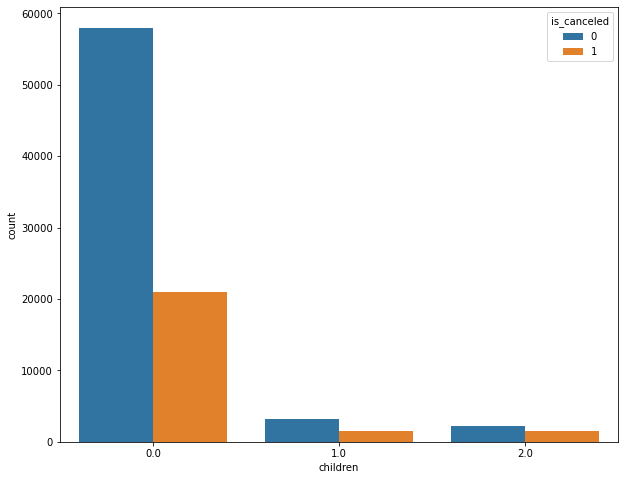

In [63]:
plt.figure(figsize=(10,8))
sns.countplot(df['children'],hue=df['is_canceled'])

In [64]:
df['babies']=df['babies'].apply(lambda x:1 if x >= 1 else x)
df['babies'].value_counts()

0    86482
1      914
Name: babies, dtype: int64

<AxesSubplot:xlabel='babies', ylabel='count'>

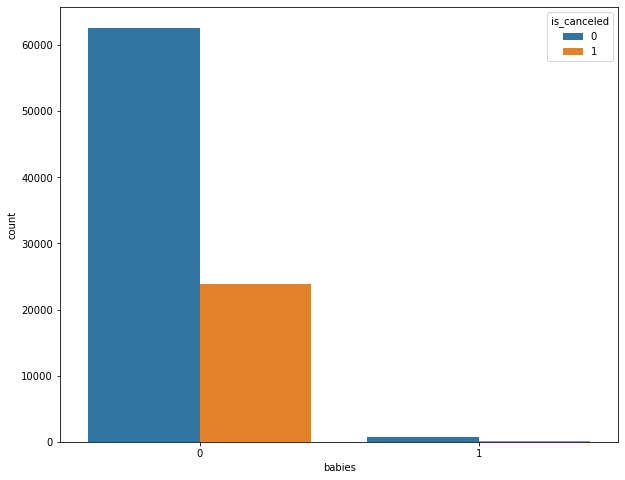

In [65]:
plt.figure(figsize=(10,8))
sns.countplot(df['babies'],hue=df['is_canceled'])

In [66]:
df['previous_cancellations']=df['previous_cancellations'].apply(lambda x:2 if x >= 2 else x)
df['previous_cancellations'].value_counts()

0    85711
1     1407
2      278
Name: previous_cancellations, dtype: int64

In [67]:
df['previous_bookings_not_canceled']=df['previous_bookings_not_canceled'].apply(lambda x:1 if x >= 1 else x)
df['previous_bookings_not_canceled'].value_counts()

0    83851
1     3545
Name: previous_bookings_not_canceled, dtype: int64

In [68]:
df['booking_changes']=df['booking_changes'].apply(lambda x:3 if x >= 3 else x)
df['booking_changes'].value_counts()

0    71494
1    10902
2     3508
3     1492
Name: booking_changes, dtype: int64

In [69]:
df['days_in_waiting_list']=df['days_in_waiting_list'].apply(lambda x:1 if x >= 1 else x)
df['days_in_waiting_list'].value_counts()

0    86536
1      860
Name: days_in_waiting_list, dtype: int64

In [70]:
value_counts=df['country'].value_counts()
value_counts.index

Index(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD',
       ...
       'BHS', 'UMI', 'NIC', 'MDG', 'SMR', 'MMR', 'BFA', 'CYM', 'MLI', 'KHM'],
      dtype='object', length=177)

In [71]:
for country in value_counts.index:
    if value_counts[country]<5000:
         df['country']=df['country'].replace(country,"others")
df['country'].value_counts()

PRT       27905
others    27582
GBR       10433
FRA        8837
ESP        7252
DEU        5387
Name: country, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

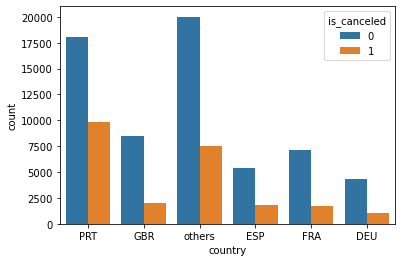

In [72]:
sns.countplot(df['country'],hue=df['is_canceled'])

# Label encoding

In [73]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,71.592373,2016.210296,15.815541,0.991590,2.533297,1.872008,0.137684,0.010458,0.039075,0.022461,0.040562,0.256236,94.138306,0.009840,104.689209,0.084226,0.698567
std,0.446466,72.442331,0.686102,8.835146,0.975146,1.689835,0.511331,0.450213,0.101729,0.193775,0.168281,0.197276,0.610976,104.995926,0.098709,47.695802,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,114.000000,2017.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,296.000000,2017.000000,31.000000,5.000000,8.000000,4.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,535.000000,1.000000,227.000000,8.000000,5.000000


In [74]:
df.describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396
unique,2,12,5,6,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,53428,11257,67978,27905,51618,69141,56552,46313,86251,71986,63371


In [75]:
objects=df.select_dtypes(include=object).columns
objects

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [76]:
pd.set_option('display.max_columns',None)
df=pd.get_dummies(df,columns=objects,drop_first=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,country_ESP,country_FRA,country_GBR,country_PRT,country_others,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
0,0,49.0,2015,1,0.0,0.0,2,0.0,0,0,0,0,3,94.138306,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,49.0,2015,1,0.0,0.0,2,0.0,0,0,0,0,3,94.138306,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,7.0,2015,1,0.0,1.0,1,0.0,0,0,0,0,0,94.138306,0,75.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,13.0,2015,1,0.0,1.0,1,0.0,0,0,0,0,0,304.000000,0,75.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,14.0,2015,1,0.0,2.0,2,0.0,0,0,0,0,0,240.000000,0,98.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 77 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87396 non-null  int64  
 1   lead_time                       87396 non-null  float64
 2   arrival_date_year               87396 non-null  int64  
 3   arrival_date_day_of_month       87396 non-null  int64  
 4   stays_in_weekend_nights         87396 non-null  float64
 5   stays_in_week_nights            87396 non-null  float64
 6   adults                          87396 non-null  int64  
 7   children                        87396 non-null  float64
 8   babies                          87396 non-null  int64  
 9   is_repeated_guest               87396 non-null  int64  
 10  previous_cancellations          87396 non-null  int64  
 11  previous_bookings_not_canceled  87396 non-null  int64  
 12  booking_changes                 

In [78]:
#shuffle the data set
import random
df=df.sample(frac=1).reset_index(drop=True)
#seperating independent and dependent features
x=df.drop(['is_canceled'],axis=1)
y=df['is_canceled']

## Undersampling
    
 Since the number of count for 1 in the target column "is_canceled" is considerably lower than that of 0 the sample needs to be balanced.Hence under sampling technique can be used here.

In [80]:
from imblearn.under_sampling import EditedNearestNeighbours
enn=EditedNearestNeighbours()
x_enn,y_enn=enn.fit_resample(x,y)
y_enn.value_counts()

0    35691
1    24025
Name: is_canceled, dtype: int64

# Scaling

In [81]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x_enn)
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,country_ESP,country_FRA,country_GBR,country_PRT,country_others,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
0,0.217182,1.166838,-1.452042,-0.982318,-0.271903,2.230716,-0.295434,-0.101674,-0.222878,-0.156933,-0.223911,-0.412763,-0.833936,-0.109459,0.858555,-0.274719,0.487053,-0.816485,-0.369306,-0.260616,-0.287464,-0.254368,-0.337024,-0.304005,3.220607,-0.321273,-0.255188,-0.300541,-0.288078,-0.063921,-0.333284,-0.344766,-0.076673,-0.300309,-0.321812,2.847073,-0.762729,-0.643740,-0.09499,-0.248381,-0.408252,-0.26916,-0.454268,0.907163,-0.005787,-0.433562,-0.046529,0.548120,-0.008185,-0.10804,-0.103837,2.100943,-0.26589,-0.175434,-0.1522,-0.084161,-0.009151,-0.010024,-0.147528,-0.160738,1.727576,-0.295076,-0.200418,-0.166404,-0.091889,-0.066001,-0.05709,-0.004092,-0.010024,-0.131824,-0.040956,-0.084865,0.474203,-0.405177,0.82045,-0.131429
1,0.037422,-0.281517,-0.656653,-0.982318,-0.865207,0.308224,-0.295434,-0.101674,-0.222878,-0.156933,-0.223911,2.889119,-0.833936,-0.109459,0.726559,-0.274719,0.487053,-0.816485,-0.369306,-0.260616,-0.287464,-0.254368,-0.337024,-0.304005,-0.310500,3.112617,-0.255188,-0.300541,-0.288078,-0.063921,-0.333284,-0.344766,-0.076673,-0.300309,-0.321812,-0.351238,-0.762729,1.553423,-0.09499,-0.248381,-0.408252,-0.26916,-0.454268,0.907163,-0.005787,-0.433562,-0.046529,0.548120,-0.008185,-0.10804,-0.103837,-0.475977,-0.26589,-0.175434,-0.1522,-0.084161,-0.009151,-0.010024,-0.147528,-0.160738,-0.578846,-0.295076,-0.200418,-0.166404,-0.091889,-0.066001,-0.05709,-0.004092,-0.010024,-0.131824,-0.040956,-0.084865,0.474203,-0.405177,0.82045,-0.131429
2,-0.902862,-0.281517,0.025109,-0.982318,-0.865207,0.308224,-0.295434,-0.101674,-0.222878,-0.156933,-0.223911,1.238178,-0.786084,-0.109459,-0.151318,-0.274719,-0.760475,-0.816485,-0.369306,-0.260616,-0.287464,3.931313,-0.337024,-0.304005,-0.310500,-0.321273,-0.255188,-0.300541,-0.288078,-0.063921,-0.333284,2.900515,-0.076673,-0.300309,-0.321812,-0.351238,1.311082,-0.643740,-0.09499,-0.248381,2.449466,-0.26916,-0.454268,-1.102338,-0.005787,2.306474,-0.046529,-1.824418,-0.008185,-0.10804,-0.103837,-0.475977,-0.26589,-0.175434,-0.1522,-0.084161,-0.009151,-0.010024,-0.147528,-0.160738,1.727576,-0.295076,-0.200418,-0.166404,-0.091889,-0.066001,-0.05709,-0.004092,-0.010024,-0.131824,-0.040956,-0.084865,0.474203,-0.405177,0.82045,-0.131429
3,-0.875206,-0.281517,-0.656653,-0.982318,-0.865207,-1.614267,-0.295434,-0.101674,-0.222878,-0.156933,-0.223911,-0.412763,-0.019126,-0.109459,-0.130366,-0.274719,-0.760475,-0.816485

In [82]:
#Trian test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_enn,test_size=0.20,random_state=88)

# Model Training and Performance Evaluation

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [84]:
# Logistic Regression

lr=LogisticRegression()
model=lr.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)

print('For train data')
print(classification_report(y_train,y_pred_train))

print('For test data')
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28595
           1       1.00      1.00      1.00     19177

    accuracy                           1.00     47772
   macro avg       1.00      1.00      1.00     47772
weighted avg       1.00      1.00      1.00     47772

For test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7096
           1       1.00      1.00      1.00      4848

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944



In [84]:
# K Nearest Neighbours

knn=KNeighborsClassifier(n_neighbors=11)
model=knn.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)

print('For train data')
print(classification_report(y_train,y_pred_train))

print('For test data')
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.88      0.82      0.85     26680
           1       0.78      0.85      0.81     19178

    accuracy                           0.83     45858
   macro avg       0.83      0.84      0.83     45858
weighted avg       0.84      0.83      0.83     45858

For test data
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      6618
           1       0.74      0.82      0.77      4847

    accuracy                           0.80     11465
   macro avg       0.79      0.80      0.80     11465
weighted avg       0.80      0.80      0.80     11465



In [85]:
#Decision Tree

dt=DecisionTreeClassifier(random_state=50,max_depth=10,max_leaf_nodes=50,criterion='entropy',min_samples_split=10)
model=dt.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)

print('For train data')
print(classification_report(y_train,y_pred_train))

print('For test data')
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     26680
           1       0.80      0.84      0.82     19178

    accuracy                           0.85     45858
   macro avg       0.84      0.85      0.84     45858
weighted avg       0.85      0.85      0.85     45858

For test data
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      6618
           1       0.81      0.85      0.83      4847

    accuracy                           0.85     11465
   macro avg       0.85      0.85      0.85     11465
weighted avg       0.85      0.85      0.85     11465



In [86]:
#Rnadom Forest Classifier

rf=RandomForestClassifier(random_state=50,max_depth=10,max_leaf_nodes=50,criterion='entropy',min_samples_split=10,n_estimators=20)
model=rf.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)

print('For train data')
print(classification_report(y_train,y_pred_train))

print('For test data')
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     26680
           1       0.80      0.78      0.79     19178

    accuracy                           0.82     45858
   macro avg       0.82      0.82      0.82     45858
weighted avg       0.82      0.82      0.82     45858

For test data
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      6618
           1       0.81      0.78      0.79      4847

    accuracy                           0.83     11465
   macro avg       0.83      0.82      0.82     11465
weighted avg       0.83      0.83      0.83     11465



In [87]:
# XG Boost

xgb=XGBClassifier()
model=xgb.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)

print('For train data')
print(classification_report(y_train,y_pred_train))

print('For test data')
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     26680
           1       0.89      0.91      0.90     19178

    accuracy                           0.92     45858
   macro avg       0.91      0.92      0.91     45858
weighted avg       0.92      0.92      0.92     45858

For test data
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      6618
           1       0.87      0.89      0.88      4847

    accuracy                           0.89     11465
   macro avg       0.89      0.89      0.89     11465
weighted avg       0.89      0.89      0.89     11465



In [88]:
#Gradient Boosting Classifier

gb=GradientBoostingClassifier()
model=gb.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)

print('For train data')
print(classification_report(y_train,y_pred_train))

print('For test data')
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.89      0.86      0.88     26680
           1       0.81      0.86      0.84     19178

    accuracy                           0.86     45858
   macro avg       0.85      0.86      0.86     45858
weighted avg       0.86      0.86      0.86     45858

For test data
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      6618
           1       0.83      0.86      0.85      4847

    accuracy                           0.87     11465
   macro avg       0.86      0.87      0.86     11465
weighted avg       0.87      0.87      0.87     11465



In [89]:
#Hyper parameter tuning Random Forest

param_grid={'max_depth':[4,8,10,12,16,18,20],'max_leaf_nodes':[30,40,45,50,55,60],'criterion':['gini','entropy'],
            'min_samples_split':[10,20,30],'n_estimators':[20,30,40,50,60]}

rf_cv=RandomForestClassifier(random_state=55)
grid=RandomizedSearchCV(rf_cv,param_grid,cv=10)

grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 20,
 'min_samples_split': 20,
 'max_leaf_nodes': 60,
 'max_depth': 20,
 'criterion': 'gini'}

In [97]:
rf2=RandomForestClassifier(max_depth=20,max_leaf_nodes=60,criterion='gini',min_samples_split=20,n_estimators=20)
model=rf2.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)
print('For train data')
print(classification_report(y_train,y_pred_train))
print('For test data')
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     26680
           1       0.82      0.79      0.80     19178

    accuracy                           0.84     45858
   macro avg       0.83      0.83      0.83     45858
weighted avg       0.84      0.84      0.84     45858

For test data
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      6618
           1       0.83      0.79      0.81      4847

    accuracy                           0.84     11465
   macro avg       0.84      0.83      0.84     11465
weighted avg       0.84      0.84      0.84     11465



In [91]:
# Hyper Prameter Tuning Decision Tree

param_grid={'max_depth':[4,8,10,12,16,18,20],'max_leaf_nodes':[25,30,40,45,50,55,60],'criterion':['gini','entropy'],
            'min_samples_split':[10,20,30,40]}

dt_cv=DecisionTreeClassifier(random_state=55)
grid=RandomizedSearchCV(dt_cv,param_grid,cv=10)

grid.fit(x_train,y_train)
grid.best_params_

{'min_samples_split': 10,
 'max_leaf_nodes': 60,
 'max_depth': 16,
 'criterion': 'entropy'}

In [98]:
dt2=DecisionTreeClassifier(random_state=22,max_depth=16,max_leaf_nodes=60,criterion='entropy',min_samples_split=10)
model=dt2.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)
print('For train data')
print(classification_report(y_train,y_pred_train))
print('For test data')
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     26680
           1       0.81      0.84      0.82     19178

    accuracy                           0.85     45858
   macro avg       0.85      0.85      0.85     45858
weighted avg       0.85      0.85      0.85     45858

For test data
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6618
           1       0.82      0.85      0.83      4847

    accuracy                           0.86     11465
   macro avg       0.85      0.85      0.85     11465
weighted avg       0.86      0.86      0.86     11465



In [93]:
#Hyper Prameter tuning XG Boost

param_grid={'learning_rate':[0.05,0.1,0.15,0.2],'max_depth':[2,4,6,8,10,12,16,18,20],'n_estimators':[30,50,80,100,120]}

xgb=XGBClassifier(random_state=55)
grid=RandomizedSearchCV(xgb,param_grid,cv=5)

grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 120, 'max_depth': 16, 'learning_rate': 0.2}

In [94]:
# Best performing model

xgb=XGBClassifier(n_estimators=100,max_depth=10,learning_rate=0.10)
model=xgb.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)

print('For train data')
print(classification_report(y_train,y_pred_train))

print('For test data')
print(classification_report(y_test,y_pred))

For train data
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     26680
           1       0.90      0.93      0.92     19178

    accuracy                           0.93     45858
   macro avg       0.93      0.93      0.93     45858
weighted avg       0.93      0.93      0.93     45858

For test data
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      6618
           1       0.87      0.88      0.88      4847

    accuracy                           0.89     11465
   macro avg       0.89      0.89      0.89     11465
weighted avg       0.89      0.89      0.89     11465



In [95]:
#Cross Validation used with XG Boost

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

xgb=XGBClassifier(n_estimators=100,max_depth=10,learning_rate=0.10)
cv=KFold(n_splits=5,shuffle=True,random_state=45)

scores=cross_val_score(xgb,x,y_enn,cv=cv,scoring='accuracy')
print(scores)
print("Mean of scores : ", round(scores.mean(),2))

[0.88696031 0.88338421 0.88975142 0.89131193 0.88773552]
Mean of scores :  0.89


In [96]:
from sklearn.model_selection import cross_val_predict

predicted=cross_val_predict(xgb,x,y_enn,cv=cv)
print(classification_report(y_enn,predicted))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     33298
           1       0.86      0.88      0.87     24025

    accuracy                           0.89     57323
   macro avg       0.88      0.89      0.89     57323
weighted avg       0.89      0.89      0.89     57323



The highest performance is obtained using XG Boost Classifier model and the highest accuracy obtained is 89%.